# 1.0 The basics of double/debiased machine learning

In the following we provide a brief summary of and motivation to the double machine learning (DML) framework and show how the corresponding methods provided by the DoubleML package can be applied. For details we refer to Chernozhukov et al. (2018).

We consider the following partially linear model

\begin{align}\begin{aligned}y_i = \theta d_i + g_0(x_i) + \zeta_i, & &\zeta_i \sim \mathcal{N}(0,1),\\d_i = m_0(x_i) + v_i, & &v_i \sim \mathcal{N}(0,1),\end{aligned}\end{align}


with covariates $x_i \sim \mathcal{N}(0, \Sigma)$, where $\Sigma$ is a matrix with entries $\Sigma_{kj} = 0.7^{|j-k|}$. We are interested in performing valid inference on the causal parameter $\theta$. The true parameter $\theta$ is set to 0.5 in our simulation experiment.

The nuisance functions are given by:

\begin{align}\begin{aligned}m_0(x_i) &= x_{i,1} + \frac{1}{4}  \frac{\exp(x_{i,3})}{1+\exp(x_{i,3})},\\g_0(x_i) &= \frac{\exp(x_{i,1})}{1+\exp(x_{i,1})} + \frac{1}{4} x_{i,3}.\end{aligned}\end{align}


In [1]:
# Import package 
import numpy as np

from doubleml.datasets import make_plr_CCDDHNR2018

ModuleNotFoundError: No module named 'doubleml'

In [2]:
np.random.seed(1234)

n_rep = 1000

n_obs = 200

n_vars = 150

alpha = 0.5

data = list()

for i_rep in range(n_rep):
    (x, y, d) = make_plr_CCDDHNR2018(alpha=alpha, n_obs=n_obs, dim_x=n_vars, return_type='array')
    data.append((x, y, d))

In [7]:
len(data)

1000

# 1.2 OLS estimation

For comparison we run a simple OLS regression of $Y$ on $D$ and $X$. As we will see in the following, due to the considered high-dimensional setting the variance of the unregularized OLS estimates is higher in comparison to the double machine learning estimates and therefore the estimates are also less efficient.

In [8]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

import seaborn as sns

colors = sns.color_palette()

def est_ols(y, X):
    ols = LinearRegression(fit_intercept=True)
    results = ols.fit(X, y)
    theta = results.coef_[0]
    return theta


# to speed up the illustration we hard-code the simulation results
theta_ols = np.array([0.59318776, 0.45971453, 0.46241367, 0.48078614, 0.47250707, 0.48543412, 0.70513768, 0.68020653, 0.51909541, 0.47951409, 0.37821017, 0.38242628, 0.55801763, 0.49086914, 0.84131015, 0.7710256 , 0.56847739, 0.45701804, 0.52761673, 0.6346921 , 0.54605122, 0.5723868 , 0.54334723, 0.65323525, 0.61125249, 0.43241426, 0.43104578, 0.45377385, 0.50867609, 0.14461668, 0.40294401, 0.43876645, 0.71483579, 0.4399299 , 0.72038435, 0.52232852, 0.35518506, 0.43642775, 0.31654814, 0.55992389, 0.63356066, 0.23340524, 0.67178528, 0.45811377, 0.64384906, 0.44535273, 0.35326843, 0.46432657, 0.72450818, 0.60858665, 0.64181596, 0.5121659 , 0.48217484, 0.40228978, 0.49558718, 0.62924855, 0.51721149, 0.50069418, 0.80139192, 0.34085407, 0.75088008, 0.30519389, 0.66133905, 0.39275145, 0.68758212, 0.55900036, 0.45024447, 0.30445786, 0.4313834 , 0.64066921, 0.47282037, 0.6848716 , 0.21635294, 0.65622022, 0.72828305, 0.63041858, 0.56954612, 0.57376026, 0.66102439, 0.41659409, 0.66243637, 0.4356498 , 0.29548206, 0.46731586, 0.65360673, 0.22210238, 0.6132152 , 0.78867833, 0.48772794, 0.22668944, 0.5905258 , 0.4000885 , 0.51811107, 0.35222288, 0.48031581, 0.58389996, 0.84767486, 0.50579516, 0.47000761, 0.51530275, 0.39533203, 0.62167001, 0.52558447, 0.62164319, 0.36240803, 0.67980513, 0.61039662, 0.30917031, 0.48828101, 0.65861219, 0.57240869, 0.46475721, 0.59948429, 0.644878  , 0.43811496, 0.50672598, 0.37570644, 0.30098601, 0.66809267, 0.35229073, 0.25343975, 0.21620671, 0.62218367, 0.59439647, 0.34133268, 0.47683222, 0.86136912, 0.53148453, 0.35280422, 0.60376521, 0.36941261, 0.59029651, 0.71232415, 0.35911796, 0.71539705, 0.41632781, 0.41994643, 0.27237688, 0.19610283, 0.33579009, 0.45026933, 0.49008255, 0.49895826, 0.53450753, 0.35522258, 0.29714548, 0.47817931, 0.43378291, 0.66762971, 0.69275525, 0.60789843, 0.67337471, 0.37707381, 0.54609838, 0.78122203, 0.7067751 , 0.31857833, 0.70237046, 0.39886057, 0.38740589, 0.55649901, 0.39888709, 0.49761043, 0.57782971, 0.65502679, 0.23982947, 0.39230768, 0.45254724, 0.75551596, 0.61865677, 0.43315527, 0.70034407, 0.48921717, 0.34448065, 0.29063194, 0.62574567, 0.08560904, 0.52672954, 0.51897996, 0.48633659, 0.40545461, 0.61618659, 0.43888745, 0.70117113, 0.56834975, 0.4353438 , 0.48782113, 0.5458835 , 0.69214867, 0.56980536, 0.66733377, 0.32372753, 0.63668482, 0.44151454, 0.47232849, 0.47463123, 0.67928778, 0.52309043, 0.45893484, 0.67134199, 0.36807602, 0.54232177, 0.48355105, 0.43718358, 0.43891791, 0.59764225, 0.09557678, 0.53424475, 0.55336975, 0.41810503, 0.74685723, 0.58437186, 0.44617578, 0.47894358, 0.37700085, 0.38144555, 0.66718062, 0.82580379, 0.58207645, 0.51268775, 0.43436392, 0.76063177, 0.35217197, 0.64642546, 0.46344298, 0.82406445, 0.22547059, 0.44871022, 0.40777041, 0.45978791, 0.58673064, 0.75452511, 0.27714111, 0.16615785, 0.23653097, 0.51675712, 0.37369916, 0.71688425, 0.39651969, 0.53974942, 0.50124734, 0.87057507, 0.57109674, 0.4961726 , 0.16852742, 0.91126084, 0.60095392, 0.89644763, 0.45482427, 0.57563471, 0.40739706, 0.59947253, 0.26911198, 0.6946975 , 0.33859101, 0.46868632, 0.44633092, 0.45329767, 0.48137464, 0.37221182, 0.36714006, 0.59867284, 0.64480537, 0.56642007, 0.60510489, 0.54518583, 0.56786103, 0.53438459, 0.42251166, 0.62091963, 0.71727092, 0.57126156, 0.48766866, 0.42415296, 0.67484828, 0.26253921, 0.47470388, 0.30665878, 0.26964429, 0.44458861, 0.50890811, 0.51881239, 0.83399069, 0.65199939, 0.3599203 , 0.30065112, 0.59042903, 0.60127214, 0.5442253 , 0.38712326, 0.36662413, 0.59696361, 0.53815764, 0.47350178, 0.2172039 , 0.54504514, 0.46664198, 0.3784215 , 0.22411117, 0.46698582, 0.45802382, 0.80279368, 0.72458228, 0.5332414 , 0.66575705, 0.39375685, 0.62272984, 0.60260018, 0.64966364, 0.32517752, 0.2818564 , 0.57051723, 0.28561171, 0.68267698, 0.76572089, 0.46197899, 0.26354168, 0.62811391, 0.48339201, 0.41040701, 0.34407777, 0.74397161, 0.58163655, 0.58848438, 0.4712122 , 0.63299441, 0.47226971, 0.84312757, 0.58690103, 0.55780786, 0.42650571, 0.72423899, 0.42848945, 0.56600457, 0.26434488, 0.32172571, 0.49642333, 0.46473514, 0.49518052, 0.44338712, 0.35435808, 0.64136388, 0.55406214, 0.64207924, 0.31352479, 0.36003016, 0.49612422, 0.50293705, 0.58085204, 0.44952171, 0.65043484, 0.41191937, 0.66542255, 0.44917533, 0.55543017, 0.45743673, 0.47363382, 0.44719089, 0.62406627, 0.4432179 , 0.37999959, 0.67229461, 0.57084708, 0.8213345 , 0.48569308, 0.66836467, 0.45638755, 0.58352417, 0.47701639, 0.53716006, 0.54852805, 0.32644371, 0.28744608, 0.63268009, 0.53282089, 0.59195658, 0.50357241, 0.52336052, 0.35179723, 0.46349958, 0.73028539, 0.42760158, 0.39364331, 0.26469956, 0.49361765, 0.6433476 , 0.58419397, 0.34466566, 0.44078549, 0.47100607, 0.34141449, 0.67467571, 0.52182799, 0.47971572, 0.45100469, 0.4058031 , 0.37551038, 0.71436864, 0.40943507, 0.41077428, 0.42161418, 0.40876852, 0.4326489 , 0.54801259, 0.58330917, 0.50158302, 0.47047853, 0.52006491, 0.47960384, 0.50235396, 0.21686093, 0.57150066, 0.48165407, 0.67596478, 0.65007464, 0.56010447, 0.47598996, 0.67206994, 0.46907106, 0.65062314, 0.34869573, 0.29144174, 0.28864541, 0.72606039, 0.65388605, 0.44821016, 0.38426961, 0.71613355, 0.40370851, 0.37693571, 0.5962973 , 0.53145349, 0.61313976, 0.75058939, 0.52339309, 0.67136156, 0.62170365, 0.53100461, 0.35853528, 0.52784428, 0.41637952, 0.57350769, 0.47613934, 0.60231196, 0.45251648, 0.48900661, 0.42829154, 0.31043151, 0.73706439, 0.71967152, 0.23245767, 0.12313164, 0.38764358, 0.45058064, 0.29000066, 0.44032338, 0.48756876, 0.25742971, 0.55950368, 0.45302682, 0.32273711, 0.70712568, 0.48139585, 0.48239776, 0.60221386, 0.39319688, 0.59877079, 0.56715362, 0.36249042, 0.17848256, 0.16838167, 0.24272911, 0.68725371, 0.49278375, 0.66689222, 0.4923022 , 0.83595761, 0.65645787, 0.36815945, 0.67653854, 0.75860092, 0.32958781, 0.8739171 , 0.65305523, 0.28007832, 0.5835609 , 0.7885053 , 0.43134965, 0.4665327 , 0.29630251, 0.58487731, 0.31402388, 0.37634538, 0.31017821, 0.54411106, 0.58228149, 0.67857093, 0.4662651 , 0.71991177, 0.54267782, 0.54814876, 0.49230113, 0.44344911, 0.54044095, 0.49486078, 0.34239824, 0.82912331, 0.4931028 , 0.6455143 , 0.72408513, 0.53179327, 0.57669499, 0.27941019, 0.70358373, 0.387985  , 0.47858681, 0.57686246, 0.35358592, 0.54423571, 0.52984391, 0.59134525, 0.38404534, 0.34715857, 0.57577872, 0.49203394, 0.36934865, 0.45879214, 0.52323179, 0.50688769, 0.77795903, 0.39970098, 0.8174074 , 0.70994741, 0.42739496, 0.71587723, 0.210805  , 0.36977447, 0.40940471, 0.45365071, 0.63924987, 0.76144695, 0.49626135, 0.42514929, 0.51333049, 0.52736324, 0.78553965, 0.99836658, 0.58560877, 0.53926485, 0.72507555, 0.5727157 , 0.5537641 , 0.53497333, 0.48095033, 0.49375619, 0.60832012, 0.59776148, 0.61076608, 0.4023326 , 0.4892973 , 0.70641856, 0.59018401, 0.58142925, 0.56410325, 0.17480185, 0.34274071, 0.69928325, 0.57447153, 0.57427467, 0.55804701, 0.4394097 , 0.26998491, 0.16007376, 0.59867694, 0.22770188, 0.6246163 , 0.37485096, 0.77129836, 0.55674016, 0.40985446, 0.51728389, 0.55585407, 0.2972799 , 0.36461585, 0.43635738, 0.50688704, 0.57609329, 0.54863157, 0.52743596, 0.43659008, 0.3630138 , 0.58241221, 0.30694678, 0.77483326, 0.38347196, 0.6486276 , 0.65569848, 0.55886832, 0.38642255, 0.21496472, 0.30529768, 0.66269774, 0.43163026, 0.37097861, 0.37842578, 0.46289863, 0.39130125, 0.35586093, 0.47998112, 0.60116294, 0.47902059, 0.54092779, 0.70337639, 0.48894294, 0.38295417, 0.45362429, 0.60171822, 0.48411367, 0.40540698, 0.55843263, 0.60064329, 0.32481347, 0.48805479, 0.37936013, 0.28188033, 0.18012661, 0.52021594, 0.59807101, 0.21777747, 0.63941109, 0.43250054, 0.31089103, 0.63056542, 0.31113406, 0.68914649, 0.38257375, 0.63430732, 0.57387416, 0.42626419, 0.51559958, 0.51423557, 0.47715882, 0.49123188, 0.33479591, 0.47485337, 0.61250023, 0.55982791, 0.4603608 , 0.57060444, 0.53265265, 0.33005468, 0.33534821, 0.50701757, 0.34863287, 0.60156818, 0.36318835, 0.48653985, 0.63495298, 0.31882775, 0.29070672, 0.61081819, 0.60035029, 0.54191366, 0.58069915, 0.86376021, 0.49147657, 0.55636647, 0.74660267, 0.46704973, 0.50933909, 0.38140262, 0.76941082, 0.5923492 , 0.27393903, 0.43008993, 0.67758134, 0.45128826, 0.77510749, 0.35359248, 0.56363219, 0.42443904, 0.68747136, 0.51261231, 0.29115268, 0.45835881, 0.65477146, 0.45888715, 0.63900626, 0.54637549, 0.62018464, 0.55044645, 0.49422625, 0.35617975, 0.51328578, 0.32400516, 0.39488301, 0.20808939, 0.50059824, 0.59516783, 0.53032753, 0.64233057, 0.17814375, 0.71128197, 0.41190639, 0.22443664, 0.42248144, 0.54223629, 0.54977878, 0.49372526, 0.59574847, 0.57766511, 0.40074797, 0.54447921, 0.42402972, 0.37966303, 0.46526625, 0.37060073, 0.42849493, 0.44825793, 0.23121664, 0.34685528, 0.62648812, 0.51122737, 0.45453868, 0.54934909, 0.31938025, 0.37601716, 0.4033514 , 0.48352587, 0.41168559, 0.41846181, 0.55574752, 0.56982557, 0.46600939, 0.40592558, 0.31251982, 0.38358162, 0.29796192, 0.58859424, 0.25974764, 0.6773811 , 0.47792482, 0.37972602, 0.40794382, 0.32190437, 0.56358727, 0.63143422, 0.51043225, 0.79278151, 0.60150745, 0.61067032, 0.48205424, 0.35165069, 0.63014378, 0.81859016, 0.3736024 , 0.58413088, 0.27355234, 0.25996236, 0.49374128, 0.61583621, 0.54552425, 0.62481345, 0.37726184, 0.55573486, 0.31997297, 0.38252179, 0.4798453 , 0.34475894, 0.70821782, 0.58723751, 0.30732769, 0.67060583, 0.35883077, 0.49432155, 0.63257589, 0.4746551 , 0.20712515, 0.34318549, 0.24861632, 0.40486138, 0.50773623, 0.6546179 , 0.41355075, 0.62549141, 0.43162361, 0.41401631, 0.50939969, 0.41119142, 0.45187448, 0.44351145, 0.55291979, 0.51731651, 0.52105935, 0.39136731, 0.30310754, 0.49255876, 0.45572459, 0.52494839, 0.33498898, 0.3144463 , 0.35948517, 0.29414201, 0.49625346, 0.4122108 , 0.57120471, 0.5987473 , 0.52627839, 0.79705665, 0.55928724, 0.4486908 , 0.45064562, 0.78453   , 0.65894434, 0.62606125, 0.35341933, 0.1144822 , 0.52058771, 0.48241874, 0.44551283, 0.64315633, 0.51214983, 0.38359794, 0.56489797, 0.44712031, 0.75022786, 0.49156776, 0.33048625, 0.79940974, 0.74946317, 0.38369986, 0.5302718 , 0.56759417, 0.57825614, 0.65246153, 0.31143474, 0.45214586, 0.46799504, 0.78050031, 0.36913631, 0.53373014, 0.82305238, 0.48862099, 0.36438137, 0.57922633, 0.41646953, 0.37273844, 0.39007451, 0.39836807, 0.14841261, 0.61327033, 0.66875887, 0.73502149, 0.45745652, 0.42192083, 0.46513111, 0.45418976, 0.37571297, 0.41068768, 0.5204207 , 0.59348836, 0.46156973, 0.64106824, 0.47531034, 0.45544494, 0.30021247, 0.56549417, 0.64254133, 0.79328525, 0.48902048, 0.38219606, 0.36521556, 0.65661227, 0.53675591, 0.4025876 , 0.55852129, 0.47575553, 0.4415518 , 0.35439118, 0.66019495, 0.59856318, 0.60701458, 0.56189854, 0.30719616, 0.40811194, 0.47623593, 0.79035699, 0.27784137, 0.53227073, 0.38980902, 0.5393956 , 0.71567933, 0.68997945, 0.39234727, 0.30167819, 0.66736201, 0.40535561, 0.57947614, 0.22358024, 0.28642175, 0.49378006, 0.43270344, 0.43663362, 0.67143985, 0.54729768, 0.61067125, 0.850662  , 0.21998077, 0.60404265, 0.20570871, 0.29620495, 0.53113463, 0.75943656, 0.53340705, 0.56367341, 1.05852851, 0.58699365, 0.55708933, 0.42770893, 0.63057458, 0.46624258, 0.35312807, 0.62739264, 0.72560502, 0.42181763, 0.64084169, 0.7895808 , 0.3345453 , 0.48617793, 0.3364872 , 0.56934345, 0.59753084, 0.57877394, 0.43379878, 0.62668416, 0.23533247, 0.17864523, 0.59186135, 0.3699303 , 0.46296373, 0.65727413, 0.54072042, 0.38174847, 0.27108012, 0.46935057, 0.682528  , 0.64984851, 0.45516901, 0.60251771, 0.42190568, 0.50217704, 0.63391551, 0.49945264, 0.51196726, 0.47544762, 0.53972717, 0.59143159, 0.48619282, 0.48911128, 0.41052774, 0.46348714, 0.1273272 , 0.59290562, 0.36932705, 0.3859974 , 0.45323001, 0.69940922, 0.11706349, 0.45047762, 0.57712164, 0.35027231, 0.65730514, 0.42432276, 0.63669957, 0.41655229, 0.74747243, 0.45330534, 0.56557449, 0.17116886, 0.51316985, 0.50161203, 0.4404198 , 0.61604064, 0.47152176, 0.52587154, 0.48142779, 0.61283785, 0.59740059, 0.50514449, 0.45842312, 0.59722182, 0.46923603, 0.45916802, 0.63621121, 0.57623313, 0.57514659, 0.49858844, 0.53234598, 0.48230869, 0.84355054])


In [13]:
theta_ols.shape

(1000,)

In [10]:
# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for i_rep in range(n_rep):
for i_rep in range(1):
    (x, y, d) = data[i_rep]
    this_theta = est_ols(y, np.column_stack((d, x)))
    print(np.abs(theta_ols[i_rep] - this_theta))
    theta_ols[i_rep] = this_theta


3.2139846339873657e-10


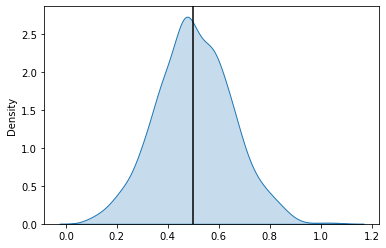

In [11]:
# Density plot 

ax = sns.kdeplot(theta_ols, shade=True, color=colors[0])

ax.axvline(0.5, color='k', label='True theta');

# 1.3 Regularization bias in simple ML-approaches

Naive inference that is based on a direct application of machine learning methods to estimate the causal parameter,$\theta$ , is generally invalid. The use of machine learning methods introduces a bias that arises due to regularization. A simple ML approach is given by randomly splitting the sample into two parts. On the auxiliary sample indexed by $i \in I^C$ the nuisance function $g_0(X)$ is estimated with an ML method, for example a random forest learner. Given the estimate $\hat{g}_0(X)$, the final estimate of $\theta$ is obtained as ($n=N/2$) using the other half of observations indexed with $i \in I$


\begin{align}\begin{aligned}\hat{\theta} = \left(\frac{1}{n} \sum_{i\in I} D_i^2\right)^{-1} \frac{1}{n} \sum_{i\in I} D_i (Y_i - \hat{g}_0(X_i)).\end{aligned}\end{align}

In [14]:
def non_orth_score(y, d, g_hat, m_hat, smpls):
    u_hat = y - g_hat
    psi_a = -np.multiply(d, d)
    psi_b = np.multiply(d, u_hat)
    return psi_a, psi_b
 

In [15]:
from doubleml import DoubleMLData

from doubleml import DoubleMLPLR

from sklearn.ensemble import RandomForestRegressor

from sklearn.base import clone

import numpy as np

np.random.seed(1111)

learner = RandomForestRegressor(n_estimators=100, max_features=n_vars, max_depth=5, min_samples_leaf=2)

ml_m = clone(learner)

ml_g = clone(learner)



In [16]:
# to speed up the illustration we hard-code the simulation results
theta_nonorth = np.array([0.46220293, 0.36751016, 0.33633589, 0.40576358, 0.41204023, 0.44099791, 0.29077441, 0.51049579, 0.40872897, 0.34517717, 0.56135355, 0.20250422, 0.30014152, 0.3121669 , 0.48135903, 0.4250507 , 0.37715598, 0.37129675, 0.48191319, 0.45303646, 0.23189062, 0.47421963, 0.46100559, 0.51690426, 0.37912305, 0.3164967 , 0.5018225 , 0.34575523, 0.40272864, 0.31201177, 0.2868938 , 0.43818704, 0.5791864 , 0.37342275, 0.61239568, 0.35811336, 0.29545835, 0.49732933, 0.40667421, 0.32322828, 0.51692541, 0.2692527 , 0.14121754, 0.33655586, 0.33198124, 0.25389419, 0.38976939, 0.32516571, 0.24778959, 0.45216823, 0.62536581, 0.33626136, 0.48605982, 0.43367237, 0.22609483, 0.45695586, 0.51988   , 0.36181456, 0.3017518 , 0.35912742, 0.33766141, 0.28139109, 0.33423182, 0.28849494, 0.35598731, 0.30291489, 0.26696673, 0.3965472 , 0.30285673, 0.38740067, 0.38927095, 0.37276621, 0.24221399, 0.2478911 , 0.19369063, 0.49629465, 0.24420607, 0.46295666, 0.38999345, 0.28754147, 0.40750691, 0.3474621 , 0.2714744 , 0.40731088, 0.40115083, 0.3567057 , 0.39989027, 0.49022217, 0.25400176, 0.53195003, 0.37218689, 0.47224868, 0.29372151, 0.29748552, 0.15382988, 0.31676935, 0.4371993 , 0.58477685, 0.47081611, 0.24718853, 0.36163077, 0.24769679, 0.35941911, 0.3296207 , 0.30717881, 0.26779407, 0.3010835 , 0.31544093, 0.53523355, 0.32454461, 0.3090798 , 0.59057928, 0.40864869, 0.30559666, 0.51896589, 0.2602647 , 0.44938393, 0.40882983, 0.39964357, 0.18228496, 0.26144559, 0.40876431, 0.27486033, 0.41148144, 0.40479421, 0.37690703, 0.43214482, 0.41183592, 0.30884357, 0.4395378 , 0.30733564, 0.28518014, 0.51267318, 0.418407  , 0.21566437, 0.38225971, 0.44524558, 0.44356552, 0.30699452, 0.28843287, 0.29729574, 0.40998509, 0.3152678 , 0.37034559, 0.32783926, 0.21489544, 0.30194505, 0.33168137, 0.57711369, 0.42932541, 0.30693366, 0.47730183, 0.31486424, 0.49108048, 0.37679733, 0.13837656, 0.38903388, 0.27232008, 0.25654145, 0.30411392, 0.32742528, 0.18762933, 0.35556439, 0.41665679, 0.36389463, 0.28492621, 0.22649755, 0.36533554, 0.32661319, 0.36891703, 0.5346196 , 0.32402164, 0.41344347, 0.43807866, 0.44701831, 0.28145691, 0.20700588, 0.32530295, 0.43505573, 0.56001566, 0.35948589, 0.49295628, 0.48489552, 0.32220793, 0.38433705, 0.32862821, 0.26534293, 0.38470655, 0.5317061 , 0.3155212 , 0.41230886, 0.31880469, 0.38930306, 0.30419097, 0.28164819, 0.44003141, 0.52568488, 0.30156178, 0.42740164, 0.25484798, 0.52973602, 0.37305963, 0.50358078, 0.40041206, 0.40130874, 0.32731488, 0.12814492, 0.54048524, 0.30212646, 0.29944921, 0.46193322, 0.48621964, 0.36634665, 0.40813239, 0.54298408, 0.22190248, 0.39525592, 0.69387251, 0.20593708, 0.28880902, 0.42479694, 0.31044302, 0.22034116, 0.31740497, 0.24030425, 0.56976883, 0.3957697 , 0.34617178, 0.29688818, 0.28557196, 0.31972769, 0.4681434 , 0.13060227, 0.28188695, 0.40322242, 0.40874094, 0.39828389, 0.35414176, 0.29122915, 0.54909401, 0.44888364, 0.50358742, 0.25438398, 0.23197   , 0.51684221, 0.48795009, 0.27609755, 0.63220386, 0.26865073, 0.50212524, 0.26094088, 0.3441297 , 0.4248767 , 0.3917966 , 0.28339179, 0.49063038, 0.23897118, 0.23529262, 0.44717751, 0.32795002, 0.32401678, 0.38156285, 0.34710818, 0.27102277, 0.28859347, 0.34379081, 0.37989127, 0.23334585, 0.3858822 , 0.24988656, 0.32844847, 0.17907128, 0.4724534 , 0.55511725, 0.49210929, 0.51413831, 0.48496465, 0.33768297, 0.45732113, 0.16237709, 0.31259887, 0.24780099, 0.44087839, 0.52862188, 0.40255284, 0.43976953, 0.39427105, 0.43236244, 0.3808625 , 0.27766508, 0.49947025, 0.38035409, 0.5427271 , 0.31245137, 0.26999138, 0.37705422, 0.24665438, 0.15804536, 0.23302156, 0.25452638, 0.20015759, 0.34178481, 0.42732665, 0.26793923, 0.432119  , 0.36664793, 0.28412842, 0.31266903, 0.37151239, 0.41072197, 0.25914919, 0.34766146, 0.35755162, 0.47770275, 0.57342129, 0.33459541, 0.26022411, 0.32527293, 0.48254574, 0.46709962, 0.32910331, 0.29890511, 0.30003679, 0.35706126, 0.67180482, 0.54421382, 0.51935982, 0.40963279, 0.48963057, 0.34349731, 0.45373368, 0.52089024, 0.18370033, 0.51526784, 0.25555252, 0.13523622, 0.41918706, 0.38274286, 0.25636761, 0.34090336, 0.38543472, 0.3500451 , 0.44221631, 0.47848301, 0.56810765, 0.28853275, 0.31266286, 0.08315981, 0.37323175, 0.37050492, 0.37132835, 0.39176757, 0.28487848, 0.34811582, 0.31341682, 0.25741468, 0.45567148, 0.42655754, 0.43384906, 0.4575956 , 0.41901164, 0.27669954, 0.28489968, 0.57725093, 0.49211554, 0.36421352, 0.42156277, 0.38157618, 0.22128394, 0.22988936, 0.37800291, 0.32438333, 0.42074574, 0.50153677, 0.4335348 , 0.39228647, 0.41168389, 0.30185482, 0.54737502, 0.33114702, 0.29556278, 0.24722737, 0.42596609, 0.27549308, 0.26901175, 0.36913136, 0.54180479, 0.2507623 , 0.36728341, 0.32845508, 0.37350956, 0.50933777, 0.16048549, 0.20709023, 0.33046893, 0.40475173, 0.49111455, 0.3316136 , 0.42223533, 0.301624  , 0.32762598, 0.43085753, 0.37455014, 0.38346095, 0.28269517, 0.31832102, 0.39854608, 0.53785366, 0.30459447, 0.25608585, 0.31575244, 0.51918424, 0.44011651, 0.48129789, 0.31309313, 0.38842631, 0.32047838, 0.51359531, 0.2291564 , 0.50243652, 0.30439938, 0.3842209 , 0.45754726, 0.34691952, 0.40119005, 0.42947326, 0.35732844, 0.7053636 , 0.51140155, 0.32063274, 0.34249698, 0.1874778 , 0.21482314, 0.48836059, 0.38574774, 0.34699361, 0.49846891, 0.20681247, 0.32080384, 0.33003434, 0.19575346, 0.40129487, 0.28568734, 0.38648456, 0.42028374, 0.31780298, 0.42404296, 0.42373512, 0.40568125, 0.47821789, 0.27384261, 0.23192378, 0.33682487, 0.2536611 , 0.31202691, 0.48949854, 0.45027394, 0.26699838, 0.23500005, 0.35938584, 0.32315096, 0.51400505, 0.5476829 , 0.47742672, 0.615812  , 0.17242558, 0.48755003, 0.31894441, 0.41555802, 0.30524289, 0.36586943, 0.30051922, 0.50294205, 0.37651153, 0.43522539, 0.49755294, 0.51112365, 0.25821398, 0.28890604, 0.55368788, 0.38367044, 0.268415  , 0.44027297, 0.05237823, 0.39204202, 0.36754218, 0.52114321, 0.34114925, 0.50433419, 0.50492222, 0.36294595, 0.4977941 , 0.44289807, 0.32654641, 0.40918277, 0.46906927, 0.64750542, 0.51347401, 0.30161206, 0.36895661, 0.54105561, 0.29029735, 0.51704962, 0.37911813, 0.40022072, 0.335743  , 0.40777632, 0.2378021 , 0.50441299, 0.46180594, 0.41043469, 0.40280337, 0.42049487, 0.52966804, 0.26675556, 0.54892945, 0.36067864, 0.35039717, 0.31671971, 0.41219094, 0.58326159, 0.29431086, 0.22111439, 0.27925197, 0.19789639, 0.43056906, 0.37760997, 0.35933596, 0.2671348 , 0.41115347, 0.21252915, 0.54231981, 0.41166753, 0.4394692 , 0.33965765, 0.42278529, 0.38197679, 0.43796052, 0.38463293, 0.3622347 , 0.34590094, 0.45161908, 0.42775285, 0.3514514 , 0.29216989, 0.56870671, 0.3728789 , 0.4840625 , 0.24939817, 0.51749173, 0.33212043, 0.33962697, 0.37728984, 0.51574754, 0.32186049, 0.35954392, 0.23945795, 0.51635551, 0.36124072, 0.17971819, 0.2733213 , 0.23709181, 0.28921415, 0.37950353, 0.35832946, 0.33919053, 0.4421467 , 0.44453859, 0.3084489 , 0.40711688, 0.18442461, 0.33353401, 0.27882742, 0.27196402, 0.27871357, 0.43660472, 0.40557353, 0.38828503, 0.29888806, 0.3077158 , 0.3003538 , 0.32188203, 0.44470064, 0.43177137, 0.2478142 , 0.40921662, 0.34603449, 0.40827106, 0.51307184, 0.31155588, 0.2422153 , 0.3897607 , 0.1496668 , 0.54856908, 0.30244926, 0.51141468, 0.41901821, 0.44441977, 0.3978117 , 0.3297629 , 0.40634361, 0.62277346, 0.22786149, 0.14830198, 0.37737936, 0.34199748, 0.25706684, 0.54490589, 0.28239921, 0.46276807, 0.45896931, 0.24764173, 0.4424539 , 0.45002468, 0.27890536, 0.32633905, 0.45257513, 0.41932199, 0.19561978, 0.55144693, 0.51333353, 0.45842698, 0.56147671, 0.36887492, 0.38624545, 0.26848941, 0.30304273, 0.32412876, 0.26750913, 0.35213321, 0.26239338, 0.27360748, 0.45712846, 0.23944032, 0.28400179, 0.24137251, 0.33875325, 0.43673468, 0.51051326, 0.39558491, 0.33674728, 0.31155873, 0.35082617, 0.3450042 , 0.2068982 , 0.42893076, 0.53609975, 0.43484156, 0.39190293, 0.40235957, 0.43536865, 0.13199344, 0.37234453, 0.36487717, 0.26998345, 0.3577768 , 0.21139084, 0.29233936, 0.31770874, 0.33413338, 0.41943277, 0.42868319, 0.44901983, 0.39465012, 0.43047094, 0.40858499, 0.32071093, 0.41479505, 0.43548872, 0.64042886, 0.44519231, 0.33936638, 0.36481828, 0.31619029, 0.33006278, 0.44194993, 0.35762225, 0.44942049, 0.47223845, 0.35970479, 0.44020136, 0.50150471, 0.45563746, 0.41909168, 0.5562186 , 0.35541362, 0.32981698, 0.3120512 , 0.51529814, 0.54700928, 0.40025523, 0.30124641, 0.52107093, 0.30245403, 0.57525517, 0.31773368, 0.27561939, 0.34122497, 0.48125339, 0.33556223, 0.34537586, 0.46446115, 0.53067435, 0.33114095, 0.04002178, 0.25309885, 0.43136239, 0.47662659, 0.30171256, 0.27291973, 0.36485227, 0.49433584, 0.53073764, 0.32822755, 0.30892213, 0.19229913, 0.49244806, 0.24253362, 0.23946686, 0.41228701, 0.23044998, 0.44281423, 0.38381084, 0.39892405, 0.25826518, 0.26965326, 0.19635469, 0.36782008, 0.32739637, 0.48639554, 0.26193771, 0.32535793, 0.42626676, 0.39908775, 0.46175108, 0.46276024, 0.19055886, 0.30795696, 0.26053898, 0.30538593, 0.39416142, 0.30411534, 0.49163854, 0.34706847, 0.25326895, 0.38240986, 0.39468779, 0.38342138, 0.43454342, 0.49144649, 0.50407511, 0.25807762, 0.12567515, 0.39743335, 0.45415779, 0.49915046, 0.41095417, 0.28133215, 0.37674896, 0.32845893, 0.424317  , 0.40249317, 0.32678539, 0.2820127 , 0.21170487, 0.28621951, 0.38618504, 0.36395987, 0.4384132 , 0.50185284, 0.38856527, 0.3355761 , 0.545829  , 0.42157608, 0.23829926, 0.35944156, 0.46892831, 0.30006905, 0.31508441, 0.13056881, 0.22983941, 0.40952014, 0.34881462, 0.51501957, 0.23724303, 0.3692855 , 0.20709138, 0.5528277 , 0.37372525, 0.44065652, 0.43773557, 0.44776214, 0.51288475, 0.43011009, 0.33546982, 0.43070946, 0.47193684, 0.26917059, 0.39031249, 0.47324386, 0.56204637, 0.37772789, 0.33920943, 0.32931146, 0.21342614, 0.39590236, 0.32683289, 0.52570395, 0.44637159, 0.49300479, 0.42811246, 0.37286832, 0.47615932, 0.29102038, 0.42614121, 0.37045208, 0.43181565, 0.39192547, 0.30357706, 0.52822227, 0.34520693, 0.15488365, 0.36314285, 0.32952075, 0.39123625, 0.45835816, 0.3492826 , 0.38845001, 0.20492465, 0.46366043, 0.45232324, 0.27062416, 0.45025608, 0.37671507, 0.44170926, 0.13905899, 0.48392469, 0.39288254, 0.37721935, 0.40392402, 0.33461498, 0.45036463, 0.29748615, 0.50968753, 0.26730238, 0.24005959, 0.38183551, 0.38616646, 0.18126938, 0.34880799, 0.28623105, 0.57572819, 0.2573925 , 0.37693313, 0.39919801, 0.4085831 , 0.4380114 , 0.22884927, 0.51024134, 0.51045657, 0.26103373, 0.21835691, 0.31725475, 0.53588833, 0.32612813, 0.22062382, 0.29764379, 0.3413454 , 0.49996528, 0.53420137, 0.3245859 , 0.41881072, 0.519687  , 0.25862658, 0.3193657 , 0.41183977, 0.39935424, 0.21932385, 0.28277402, 0.35613808, 0.51934429, 0.41845812, 0.53898359, 0.34761971, 0.26069961, 0.33369592, 0.37569057, 0.28494363, 0.50120447, 0.51826334, 0.33040705, 0.31342893, 0.37243041, 0.42314929, 0.22700338, 0.27982161, 0.35893721, 0.64832742, 0.36727074, 0.44908435, 0.17402012, 0.38247934, 0.46182565, 0.5271202 , 0.35202818, 0.30764646, 0.06996173, 0.48846568, 0.44200333, 0.31534363, 0.53015202, 0.37123406, 0.3615767 , 0.51298256, 0.50919104, 0.37256098, 0.3157192 , 0.31559631, 0.26691721, 0.44900753, 0.5329662 , 0.28359587, 0.4504041 , 0.25494302, 0.36263564, 0.43255345, 0.27407261, 0.39549419, 0.15953733, 0.30779378, 0.60872717, 0.50432529, 0.48100406, 0.46652201, 0.32864931, 0.20978906, 0.29146115, 0.53688804, 0.35460348, 0.31504874, 0.50239211, 0.32996978, 0.52825463, 0.36588116, 0.39051713, 0.35607859, 0.33992489, 0.25465816, 0.45846204, 0.33398612, 0.3052152 , 0.28117745, 0.29579359, 0.51187272, 0.3966739 , 0.41773266, 0.41882469, 0.15269325, 0.34683192, 0.21951749, 0.38644923, 0.25555259, 0.52044651, 0.39453725, 0.20224927, 0.28396396, 0.31936779, 0.25661765, 0.16838062, 0.38081762, 0.37654759, 0.2889413 , 0.40671267, 0.38476536, 0.21671325, 0.58133803, 0.28200238, 0.34528347, 0.1572706 , 0.41332857, 0.3043431 , 0.35589781, 0.34931822, 0.44463928, 0.21289216, 0.30333574, 0.3463518 , 0.37693294, 0.21480485, 0.34142576, 0.43366436, 0.4640764 , 0.42274242, 0.42184705, 0.4473984 , 0.41991344, 0.502675  , 0.38368096, 0.2441497 , 0.52133242])
theta_nonorth.size

1000

0.004235928792879096


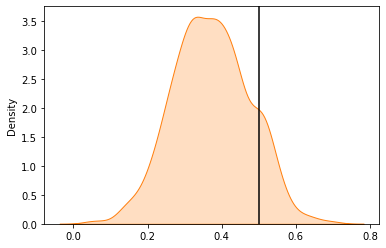

In [17]:
# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for i_rep in range(n_rep):

for i_rep in range(1):
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr_nonorth = DoubleMLPLR(obj_dml_data,
                                      ml_m, ml_g,
                                      n_folds=2,
                                      apply_cross_fitting=False,
                                      score=non_orth_score)
    obj_dml_plr_nonorth.fit()
    this_theta = obj_dml_plr_nonorth.coef[0]
    print(np.abs(theta_nonorth[i_rep] - this_theta))
    theta_nonorth[i_rep] = this_theta

    
ax = sns.kdeplot(theta_nonorth, shade=True, color=colors[1])

ax.axvline(0.5, color='k', label='True theta');

The regularization bias in the simple ML-approach is caused by the slow convergence of  $\theta$

\begin{align}\begin{aligned}|\sqrt{n} (\hat{\theta} - \theta) | \rightarrow_{P} \infty \end{aligned}\end{align}

i.e., slower than $1/\sqrt{n}$. The driving factor is the bias that arises by learning  with a random forest or any other ML technique. A heuristic illustration is given by

\begin{align}\begin{aligned} \sqrt{n}(\hat{\theta} - \theta) = \underbrace{\left(\frac{1}{n} \sum_{i\in I} D_i^2\right)^{-1} \frac{1}{n} \sum_{i\in I} D_i \zeta_i}_{=:a} +  \underbrace{\left(\frac{1}{n} \sum_{i\in I} D_i^2\right)^{-1} \frac{1}{n} \sum_{i\in I} D_i (g_0(X_i) - \hat{g}_0(X_i))}_{=:b}. \end{aligned}\end{align}


 $a$ is approximately Gaussian under mild conditions. However, $b$ (the regularization bias) diverges in general.

# 1.4. Overcoming regularization bias by orthogonalization

To overcome the regularization bias we can partial out the effect of $X$ from $D$ to obtain the orthogonalized regressor $V = D - m(X)$ . We then use the final estimate

\begin{align}\begin{aligned} 
\check{\theta} = \left(\frac{1}{n} \sum_{i\in I} \hat{V}_i D_i\right)^{-1} \frac{1}{n} \sum_{i\in I} \hat{V}_i (Y_i - \hat{g}_0(X_i)).
\end{aligned}\end{align}

0.0015820104144769198


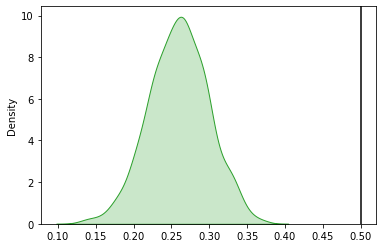

In [18]:
import numpy as np

np.random.seed(2222)

# to speed up the illustration we hard-code the simulation results
theta_orth_nosplit = np.array([0.28310852, 0.2242779 , 0.21826119, 0.27480264, 0.2632724 , 0.26145622, 0.35155547, 0.29961815, 0.26635995, 0.2916099 , 0.26905356, 0.20612577, 0.26398208, 0.24738297, 0.31720634, 0.33410743, 0.22858844, 0.27328181, 0.2883969 , 0.32534549, 0.23480727, 0.27738886, 0.24176323, 0.30223882, 0.25703061, 0.24784644, 0.31566354, 0.27268702, 0.26854096, 0.17321738, 0.25972241, 0.22442174, 0.29994908, 0.32036162, 0.32746914, 0.24166733, 0.19887599, 0.30592848, 0.22804781, 0.23233486, 0.30921309, 0.23463971, 0.29075226, 0.1809537 , 0.27576646, 0.27086624, 0.24678385, 0.20240443, 0.25876583, 0.25828577, 0.34559146, 0.26086781, 0.33256474, 0.29259962, 0.25623473, 0.26968172, 0.26378077, 0.19208867, 0.24181579, 0.29534961, 0.2733621 , 0.22095648, 0.28348618, 0.30043176, 0.25261295, 0.26165325, 0.28380731, 0.23151629, 0.25394419, 0.23464047, 0.24771   , 0.29674846, 0.20385661, 0.21034693, 0.22878356, 0.29613812, 0.29508396, 0.17701553, 0.27132781, 0.23536996, 0.26647282, 0.19601602, 0.21138042, 0.25673211, 0.2520547 , 0.24963577, 0.21469675, 0.27812185, 0.28731821, 0.21461844, 0.32501942, 0.27049369, 0.25925077, 0.15021988, 0.22308663, 0.25618922, 0.29798101, 0.27308533, 0.28463352, 0.27359688, 0.23853733, 0.25253259, 0.28388183, 0.27816227, 0.19846811, 0.20672709, 0.24345814, 0.21094738, 0.29825134, 0.27913302, 0.25599672, 0.28127914, 0.21570845, 0.23568041, 0.27717801, 0.24924811, 0.29236107, 0.22863753, 0.28686067, 0.21806731, 0.19096662, 0.1991767 , 0.29704411, 0.26143366, 0.2855753 , 0.22812379, 0.31258998, 0.24737797, 0.29765883, 0.26660461, 0.22636728, 0.19561781, 0.30000204, 0.28156593, 0.2518048 , 0.24588117, 0.29438604, 0.27202006, 0.19251048, 0.29858927, 0.30207488, 0.27311435, 0.22591445, 0.23439006, 0.22010727, 0.19731043, 0.28078517, 0.2686372 , 0.263956  , 0.29857334, 0.2474458 , 0.24640703, 0.21223515, 0.22386055, 0.2255213 , 0.15326043, 0.2518272 , 0.31929998, 0.26351882, 0.21678552, 0.29317478, 0.26989617, 0.2818495 , 0.2848359 , 0.21478301, 0.22616049, 0.21466051, 0.26933743, 0.26859455, 0.23889104, 0.29573917, 0.24851225, 0.28498028, 0.27178069, 0.21132864, 0.24681366, 0.17802672, 0.27507623, 0.30868363, 0.23293956, 0.30121311, 0.27621463, 0.26063687, 0.23322101, 0.24393135, 0.23227465, 0.22844058, 0.30839355, 0.22210363, 0.22822178, 0.24866478, 0.21586847, 0.26500871, 0.2471022 , 0.20997401, 0.23643077, 0.25231603, 0.27148353, 0.28322569, 0.33346698, 0.25167926, 0.26491853, 0.24722962, 0.27637599, 0.23881742, 0.2296211 , 0.19967581, 0.31846702, 0.29736598, 0.27647978, 0.30541239, 0.23427654, 0.24818056, 0.26726521, 0.26369045, 0.24638188, 0.27767191, 0.30294559, 0.28852899, 0.27617697, 0.21988934, 0.292125  , 0.18724467, 0.26117014, 0.24419148, 0.2871237 , 0.24905991, 0.22842965, 0.27704528, 0.25578749, 0.25142395, 0.36927582, 0.22390373, 0.21829721, 0.12744814, 0.26925737, 0.20636333, 0.20155245, 0.21186804, 0.26988056, 0.24059909, 0.31412907, 0.26759994, 0.22547844, 0.23929809, 0.26712295, 0.29086087, 0.31798801, 0.29562617, 0.33280922, 0.26751236, 0.28698399, 0.22986446, 0.2763425 , 0.19818218, 0.24978374, 0.2734057 , 0.25108121, 0.29437982, 0.20228561, 0.22372583, 0.25953038, 0.3081489 , 0.30320545, 0.21424474, 0.27065109, 0.26593162, 0.29835337, 0.24485177, 0.30415425, 0.28980662, 0.2680405 , 0.239961  , 0.24617116, 0.28658336, 0.29611991, 0.25713896, 0.30998392, 0.2665378 , 0.18528186, 0.2424845 , 0.25698249, 0.33527911, 0.3207351 , 0.23184278, 0.26313123, 0.28758601, 0.25173612, 0.27760017, 0.26816815, 0.28290835, 0.27865219, 0.35303055, 0.25650497, 0.16584378, 0.25912287, 0.18661047, 0.24201838, 0.19715925, 0.25251827, 0.23211738, 0.33786812, 0.2259777 , 0.24312618, 0.26597777, 0.20004984, 0.18565445, 0.2554961 , 0.17862975, 0.25421527, 0.19827303, 0.27165019, 0.266252  , 0.30177934, 0.29902409, 0.25955909, 0.19670987, 0.22927377, 0.24951701, 0.27330244, 0.22528742, 0.26322332, 0.30611685, 0.24612744, 0.27514948, 0.28442492, 0.27129947, 0.29369819, 0.2795243 , 0.29063484, 0.24778475, 0.29604971, 0.22014627, 0.27125729, 0.22028222, 0.23937117, 0.35621441, 0.22856674, 0.21706003, 0.27878548, 0.23050219, 0.27815778, 0.29854744, 0.32191927, 0.22175815, 0.22458026, 0.25637069, 0.19114296, 0.29236829, 0.25682208, 0.29432575, 0.23749481, 0.28604151, 0.28598776, 0.29619051, 0.25680905, 0.34011962, 0.24549912, 0.29141369, 0.23814109, 0.21578371, 0.2807999 , 0.27404827, 0.28924312, 0.20979212, 0.27621514, 0.32499504, 0.28444786, 0.20769076, 0.21044053, 0.21242127, 0.2025243 , 0.26759374, 0.29333089, 0.31110005, 0.30975388, 0.25719257, 0.28956785, 0.2484451 , 0.25275622, 0.29471806, 0.23193147, 0.25748414, 0.16584411, 0.31336108, 0.22796508, 0.32666538, 0.22967239, 0.2605007 , 0.21030846, 0.17930794, 0.25799981, 0.22374191, 0.24851312, 0.18130437, 0.26671058, 0.28468216, 0.26699029, 0.23856576, 0.2378861 , 0.29746227, 0.22210649, 0.25561485, 0.30647856, 0.31982858, 0.23269608, 0.23954949, 0.27028194, 0.2659938 , 0.16761426, 0.23152631, 0.26632464, 0.25441972, 0.31960062, 0.2765675 , 0.26511514, 0.22645075, 0.29570968, 0.222362  , 0.25907818, 0.19219834, 0.18055943, 0.27491122, 0.26250238, 0.32790241, 0.24976504, 0.22750637, 0.33063588, 0.29926466, 0.2392139 , 0.27519006, 0.29970428, 0.25545158, 0.29449147, 0.23462131, 0.24624584, 0.25795428, 0.25209296, 0.24903425, 0.2664015 , 0.24116091, 0.23901285, 0.28603948, 0.26749332, 0.24186271, 0.25248758, 0.19619871, 0.3029078 , 0.2967233 , 0.3082407 , 0.21993216, 0.2433419 , 0.288618  , 0.21555319, 0.25470933, 0.23773486, 0.29546983, 0.21327642, 0.24956888, 0.2889786 , 0.24442302, 0.33887585, 0.31841493, 0.24695447, 0.32795625, 0.20303785, 0.27606344, 0.26365563, 0.31353331, 0.22108299, 0.34605167, 0.18610914, 0.28660735, 0.32646627, 0.298221  , 0.27317117, 0.3345105 , 0.25627246, 0.32404571, 0.30980458, 0.26954175, 0.20478813, 0.3305093 , 0.29632759, 0.2263084 , 0.26588734, 0.32757012, 0.20919784, 0.22280691, 0.24741845, 0.23078147, 0.23477978, 0.2658129 , 0.24613582, 0.25510153, 0.24454531, 0.32516082, 0.30274893, 0.23969294, 0.28680135, 0.24591505, 0.21699139, 0.30187635, 0.29572537, 0.2630132 , 0.26787657, 0.24316903, 0.26117894, 0.299745  , 0.30256152, 0.31785968, 0.29531903, 0.3064115 , 0.29840839, 0.20857716, 0.27004916, 0.25333668, 0.20998201, 0.26692238, 0.2723465 , 0.32207802, 0.22611339, 0.20679392, 0.24201841, 0.26512521, 0.25212648, 0.2576815 , 0.23881843, 0.23155785, 0.36747982, 0.19636713, 0.32124027, 0.2427754 , 0.2011566 , 0.33390234, 0.18539832, 0.30159911, 0.20772415, 0.2356763 , 0.34007911, 0.29580993, 0.22988797, 0.21634261, 0.26545917, 0.16314891, 0.33988473, 0.29242298, 0.22733269, 0.24611494, 0.30183313, 0.32251464, 0.26732256, 0.24792092, 0.2772301 , 0.28939186, 0.26631433, 0.28354286, 0.33360631, 0.24205665, 0.1961794 , 0.24519602, 0.23249065, 0.23737376, 0.25656539, 0.21403472, 0.29415284, 0.26959061, 0.23195155, 0.26536177, 0.24566337, 0.23165363, 0.22660996, 0.26522449, 0.33309614, 0.21471191, 0.30851745, 0.25249242, 0.31809431, 0.22793364, 0.27710466, 0.27294355, 0.29596034, 0.29298504, 0.2859605 , 0.27495038, 0.26136098, 0.2934716 , 0.27540508, 0.2690389 , 0.31972379, 0.22868217, 0.29370394, 0.20299354, 0.34906811, 0.28639738, 0.37465074, 0.2956081 , 0.2842431 , 0.24320374, 0.27014277, 0.2242631 , 0.28506609, 0.25101436, 0.24047286, 0.25575328, 0.22997231, 0.2205248 , 0.21703479, 0.20778374, 0.25258876, 0.2401245 , 0.29990474, 0.26323848, 0.25627857, 0.26284862, 0.2441438 , 0.23134306, 0.22144132, 0.30448487, 0.25150713, 0.22797692, 0.24349524, 0.34462206, 0.27105137, 0.2892143 , 0.26127535, 0.25287297, 0.23561471, 0.14121307, 0.30581663, 0.29274273, 0.24767589, 0.33147642, 0.27992392, 0.33720554, 0.2090374 , 0.27164353, 0.31701844, 0.28533359, 0.25799022, 0.3070244 , 0.17683673, 0.21358908, 0.26084117, 0.22207999, 0.3236883 , 0.33255362, 0.24625949, 0.24396244, 0.30353548, 0.32189553, 0.26497649, 0.23178877, 0.24712478, 0.29951475, 0.24184459, 0.24421118, 0.30500367, 0.25970607, 0.27909354, 0.25431678, 0.27946877, 0.23949309, 0.26691102, 0.28535357, 0.26128905, 0.25824165, 0.28183132, 0.17514963, 0.33431912, 0.18331401, 0.26675644, 0.30160769, 0.2497697 , 0.22613143, 0.26237311, 0.26848567, 0.28228926, 0.29263579, 0.29236556, 0.1840749 , 0.24696389, 0.26452469, 0.28719122, 0.23128346, 0.24169805, 0.23304394, 0.218957  , 0.25475361, 0.35289907, 0.2867506 , 0.26357185, 0.2270227 , 0.25602031, 0.27716229, 0.20449755, 0.26554645, 0.25110001, 0.24079137, 0.30162768, 0.28170507, 0.17551756, 0.32547549, 0.22677441, 0.14042389, 0.17337534, 0.26256224, 0.23707877, 0.22717987, 0.24024014, 0.25177129, 0.27503805, 0.28114949, 0.25896209, 0.2662017 , 0.21796715, 0.23287975, 0.20286762, 0.23630051, 0.24797168, 0.23176171, 0.3070345 , 0.24794182, 0.21011151, 0.23875281, 0.25753579, 0.21149103, 0.23827549, 0.21968091, 0.26969627, 0.26792777, 0.20638949, 0.27621866, 0.2604688 , 0.26865353, 0.2157272 , 0.15645571, 0.26005388, 0.24269695, 0.26726758, 0.29685328, 0.25025327, 0.25305107, 0.22538429, 0.23264148, 0.26118271, 0.22936266, 0.24315368, 0.26195489, 0.28365961, 0.27980084, 0.26609696, 0.1696261 , 0.33175361, 0.28457782, 0.29927934, 0.23976468, 0.23491615, 0.18087741, 0.20349075, 0.21891415, 0.2522452 , 0.27317506, 0.20354548, 0.29480749, 0.23066701, 0.24240663, 0.28959264, 0.23725127, 0.3009052 , 0.3272782 , 0.33884528, 0.32950748, 0.26603133, 0.28544335, 0.31174843, 0.35525527, 0.16409966, 0.20273623, 0.21960992, 0.20445596, 0.25733506, 0.26104803, 0.25997223, 0.2684171 , 0.27375778, 0.19854972, 0.28553536, 0.25885901, 0.28304118, 0.2621129 , 0.27795949, 0.28436075, 0.25445093, 0.24717689, 0.22179333, 0.31690662, 0.21867459, 0.27198495, 0.25701943, 0.28360551, 0.23875228, 0.22175629, 0.21333009, 0.2300189 , 0.25209904, 0.28502759, 0.27892907, 0.27256734, 0.23018934, 0.25019992, 0.24872246, 0.26869467, 0.22006607, 0.31613469, 0.19378017, 0.25437549, 0.31010428, 0.2239705 , 0.20986456, 0.2981559 , 0.22735091, 0.2385243 , 0.28349625, 0.26244455, 0.22222827, 0.25961584, 0.23382021, 0.28271075, 0.27364524, 0.22208577, 0.22338154, 0.25133704, 0.2927259 , 0.27249243, 0.19810369, 0.29739084, 0.23977764, 0.33163001, 0.20838183, 0.32524989, 0.22693308, 0.24781074, 0.26384576, 0.24114416, 0.22417866, 0.26879515, 0.2671183 , 0.27647383, 0.21137266, 0.25714512, 0.31201653, 0.28097195, 0.23299879, 0.2663719 , 0.28909349, 0.2835265 , 0.25468493, 0.24928326, 0.26264776, 0.28256157, 0.19424368, 0.2629451 , 0.29564766, 0.23307118, 0.21502833, 0.28635937, 0.28488341, 0.2700886 , 0.28704458, 0.27922478, 0.17263791, 0.28635712, 0.23075424, 0.17741433, 0.23449618, 0.18159064, 0.25603823, 0.24429592, 0.252812  , 0.27307543, 0.34339119, 0.252644  , 0.29226866, 0.19520718, 0.27469428, 0.28431326, 0.2082317 , 0.28421696, 0.3070267 , 0.30473623, 0.27110717, 0.28557713, 0.25306611, 0.20115915, 0.28109259, 0.23066984, 0.29306542, 0.23246166, 0.26619353, 0.26780462, 0.21972068, 0.21848152, 0.33710686, 0.2530146 , 0.25794811, 0.26789696, 0.20139948, 0.31620582, 0.18905824, 0.30757573, 0.25823602, 0.32225168, 0.29416294, 0.33819316, 0.33667058, 0.24208325, 0.24359405, 0.26374286, 0.28239228, 0.23335644, 0.27874058, 0.30653043, 0.26781161, 0.2588007 , 0.26839054, 0.28338128, 0.28230784, 0.28294972, 0.26593038, 0.33051548, 0.31535588, 0.22534891, 0.29542099, 0.25698647, 0.30864245, 0.21753042, 0.25400367, 0.22775759, 0.19603169, 0.23960378, 0.31154354, 0.27754087, 0.20881702, 0.28891996, 0.28937791, 0.29420089, 0.26498318, 0.30885406, 0.26559376, 0.27107953, 0.31337713, 0.21710285, 0.24758666, 0.24602542, 0.2719711 , 0.29087773, 0.22520773, 0.22748796, 0.20393595, 0.28756757, 0.14159469, 0.30246539, 0.20772598, 0.2444757 , 0.25797414, 0.27913936, 0.13832664, 0.15671679, 0.3150215 , 0.21286612, 0.30024509, 0.25108497, 0.33896346, 0.23340797, 0.32430489, 0.27986208, 0.24811693, 0.18176737, 0.23715368, 0.19188467, 0.28837014, 0.28031912, 0.26374323, 0.2776042 , 0.19989007, 0.27678714, 0.29959389, 0.19771432, 0.2368231 , 0.36130171, 0.23823292, 0.22617482, 0.24363743, 0.28811019, 0.31579602, 0.25930383, 0.22536299, 0.29135006, 0.28875076])

# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for i_rep in range(n_rep):

for i_rep in range(1):
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr_orth_nosplit = DoubleMLPLR(obj_dml_data,
                                           ml_g, ml_m,
                                           n_folds=1,
                                           score='IV-type',
                                           apply_cross_fitting=False)
    obj_dml_plr_orth_nosplit.fit()
    this_theta = obj_dml_plr_orth_nosplit.coef[0]
    print(np.abs(theta_orth_nosplit[i_rep] - this_theta))
    theta_orth_nosplit[i_rep] = this_theta

#0.0015659114027761212

ax = sns.kdeplot(theta_orth_nosplit, shade=True, color=colors[2])

ax.axvline(0.5, color='k', label='True theta');

If the nuisance models $\hat{g}_0()$ and $\hat{m}()$ are estimated on the whole dataset, which is also used for obtaining the final estimate $\check{\theta}$, another bias is observed.

# 1.5. Sample splitting to remove bias induced by overfitting

Using sample splitting, i.e., estimate the nuisance models $\hat{g}_0()$ and  $\hat{m}()$
 on one part of the data (training data) and estimate $\check{\theta}$ on the other part of the data (test data), overcomes the bias induced by overfitting. We can exploit the benefits of cross-fitting by switching the role of the training and test sample. Cross-fitting performs well empirically because the entire sample can be used for estimation.

0.003945898719078356


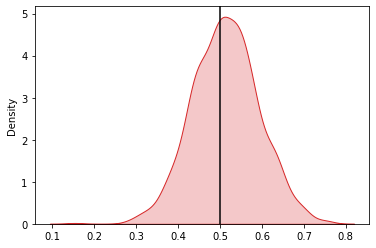

In [19]:
#import numpy as np

np.random.seed(3333)

# to speed up the illustration we hard-code the simulation results
theta_dml = np.array([0.52231688, 0.43821994, 0.36741092, 0.52884091, 0.5015594 , 0.58615797, 0.50844654, 0.54049318, 0.54273396, 0.53888897, 0.507104  , 0.40035828, 0.48716359, 0.46810072, 0.64261576, 0.71117208, 0.42699728, 0.4835898 , 0.49635877, 0.50369895, 0.5347252 , 0.49725455, 0.53288677, 0.58781331, 0.58458898, 0.577733  , 0.63314775, 0.56648841, 0.51656325, 0.5853161 , 0.55397083, 0.49646073, 0.70452214, 0.57921975, 0.66033219, 0.4141339 , 0.39301364, 0.59563687, 0.48364131, 0.48707462, 0.59045756, 0.50181798, 0.55173923, 0.37780184, 0.49094078, 0.56072755, 0.51914519, 0.47253627, 0.56482564, 0.45755482, 0.58579367, 0.45175687, 0.55837968, 0.59198114, 0.54112865, 0.51840052, 0.45087786, 0.43342863, 0.51636424, 0.62517089, 0.47311126, 0.39433771, 0.62839357, 0.55921553, 0.54676839, 0.5514561 , 0.57210741, 0.45656539, 0.50132608, 0.52485313, 0.52286524, 0.50770619, 0.35230866, 0.47302836, 0.47157604, 0.57120419, 0.59794613, 0.39487438, 0.44932531, 0.42548093, 0.55208887, 0.41394061, 0.43047632, 0.52314211, 0.46423066, 0.55004184, 0.40263037, 0.58500625, 0.47131007, 0.49528316, 0.65274651, 0.56246206, 0.59342141, 0.34467363, 0.5241102 , 0.53508769, 0.63755611, 0.54296967, 0.49532379, 0.55710514, 0.4727814 , 0.54287473, 0.54378878, 0.49598911, 0.44567613, 0.4226033 , 0.64046948, 0.424174  , 0.61146764, 0.53384126, 0.55580259, 0.53620641, 0.51944699, 0.44616688, 0.51671817, 0.47795645, 0.5214811 , 0.53330363, 0.43300768, 0.42334047, 0.35713199, 0.40525562, 0.56143502, 0.53251642, 0.57514168, 0.49649141, 0.66445602, 0.50344163, 0.58956719, 0.56268392, 0.52784727, 0.44697895, 0.54770617, 0.53614504, 0.48910506, 0.55732374, 0.6531372 , 0.45389849, 0.42714495, 0.50654265, 0.48575044, 0.54396153, 0.43507166, 0.49297671, 0.46060164, 0.33423935, 0.50641641, 0.51755618, 0.50710273, 0.58446034, 0.47326171, 0.56809047, 0.4116598 , 0.42240973, 0.51417129, 0.27841046, 0.45627347, 0.68837064, 0.46094653, 0.48798373, 0.6511203 , 0.55781644, 0.50132081, 0.68950118, 0.48040854, 0.4163646 , 0.44550726, 0.64579671, 0.55585583, 0.53346571, 0.54568866, 0.49305727, 0.5152283 , 0.61874024, 0.390471  , 0.57150632, 0.32169275, 0.56058687, 0.57962266, 0.42481201, 0.53675902, 0.58994957, 0.43245621, 0.52331344, 0.52329625, 0.43588796, 0.5770294 , 0.65409674, 0.52500875, 0.61645547, 0.46385359, 0.4056565 , 0.55277716, 0.51648013, 0.43605219, 0.45182095, 0.5321275 , 0.4447037 , 0.63397192, 0.62649506, 0.46668121, 0.4728771 , 0.52408038, 0.55460523, 0.49997893, 0.48603239, 0.47103121, 0.50781173, 0.6053177 , 0.49600114, 0.66377765, 0.41521762, 0.45647306, 0.60474739, 0.51181494, 0.48838955, 0.52510073, 0.61873979, 0.59586349, 0.57212219, 0.47198398, 0.5853836 , 0.42265219, 0.56646153, 0.4917164 , 0.57298278, 0.45851783, 0.39114968, 0.47425745, 0.50817601, 0.47754206, 0.67444964, 0.42658415, 0.42328879, 0.15379653, 0.51150188, 0.45829511, 0.42705282, 0.46390192, 0.52950714, 0.62715833, 0.58637768, 0.54803618, 0.49196057, 0.46279048, 0.50294143, 0.59226854, 0.60229713, 0.54225779, 0.5941689 , 0.47815737, 0.49883862, 0.48486635, 0.47261218, 0.43825047, 0.54336212, 0.51513842, 0.49567064, 0.61158689, 0.4129319 , 0.40661419, 0.51351605, 0.55734222, 0.51180806, 0.37477852, 0.49815911, 0.44054231, 0.53456185, 0.44864891, 0.58385036, 0.58104914, 0.59503922, 0.46185033, 0.44327255, 0.52114896, 0.61396954, 0.63000332, 0.66269052, 0.43450281, 0.39520424, 0.51656259, 0.45925242, 0.58154243, 0.6988516 , 0.4913753 , 0.4894337 , 0.56580656, 0.59821097, 0.5797311 , 0.41818885, 0.4976684 , 0.522177  , 0.68252638, 0.56276602, 0.37200166, 0.50755061, 0.3880415 , 0.49663169, 0.35715457, 0.54248505, 0.43303048, 0.64253914, 0.47356476, 0.51391693, 0.48855358, 0.37799246, 0.49398403, 0.56951529, 0.37688991, 0.49160708, 0.52690356, 0.52686674, 0.51215801, 0.57698389, 0.61241361, 0.52619258, 0.35055098, 0.48837412, 0.4407033 , 0.50077959, 0.45479108, 0.51414254, 0.63376111, 0.45150698, 0.46214344, 0.54575133, 0.60024207, 0.55953047, 0.51969718, 0.48523973, 0.47544462, 0.58340948, 0.38439877, 0.52759982, 0.41346489, 0.38991315, 0.68026434, 0.45986472, 0.43181916, 0.50648118, 0.3894343 , 0.62873892, 0.6592354 , 0.65293863, 0.46845371, 0.45012085, 0.57589279, 0.39502274, 0.52358881, 0.48640999, 0.54039256, 0.47576126, 0.62924319, 0.54273178, 0.50646707, 0.50287318, 0.59946252, 0.56940881, 0.59930375, 0.51774736, 0.48263752, 0.53941484, 0.49248521, 0.57155063, 0.4264775 , 0.51036859, 0.71054727, 0.53996883, 0.42901143, 0.41232303, 0.44549526, 0.38168336, 0.40328314, 0.53762153, 0.61349677, 0.60404878, 0.44697336, 0.54711955, 0.48216981, 0.55000164, 0.64022518, 0.52600931, 0.44678145, 0.43829697, 0.58384623, 0.43745937, 0.68318971, 0.45586054, 0.60599063, 0.4499793 , 0.42205188, 0.49386855, 0.5555232 , 0.5126009 , 0.3240312 , 0.55874947, 0.47750057, 0.58195061, 0.48240565, 0.48431244, 0.63907141, 0.42301053, 0.54758077, 0.64710017, 0.56611208, 0.3826722 , 0.51005073, 0.56860342, 0.46451647, 0.3152289 , 0.40651669, 0.54816232, 0.51171719, 0.61816035, 0.4923172 , 0.51395075, 0.4347128 , 0.6575245 , 0.43948447, 0.50860031, 0.52244094, 0.45780077, 0.5074908 , 0.5148614 , 0.63876247, 0.40235826, 0.45600197, 0.57247591, 0.58371552, 0.48872538, 0.56422632, 0.61667083, 0.47123427, 0.5550912 , 0.43315088, 0.50986655, 0.54065827, 0.44640175, 0.50459281, 0.54848554, 0.57166077, 0.47517982, 0.56219177, 0.50764385, 0.53088791, 0.43948164, 0.41238775, 0.70538166, 0.51623739, 0.56201525, 0.53010466, 0.50596836, 0.61114539, 0.42662833, 0.49634016, 0.46679557, 0.55409602, 0.38539755, 0.488031  , 0.57784212, 0.41440968, 0.69530549, 0.64241962, 0.43608626, 0.57265769, 0.41271096, 0.47754829, 0.57995155, 0.58981953, 0.42852998, 0.75993644, 0.36916639, 0.54238425, 0.55902348, 0.63663933, 0.56209095, 0.67578255, 0.47549209, 0.55657308, 0.60054174, 0.62168949, 0.45213496, 0.62205182, 0.50193585, 0.4553445 , 0.64101172, 0.65653997, 0.48887577, 0.50473288, 0.46740208, 0.60913356, 0.36652889, 0.53297661, 0.46235313, 0.50740879, 0.49457405, 0.59901308, 0.51292321, 0.42683503, 0.50625828, 0.4959117 , 0.50273795, 0.53775403, 0.56970437, 0.47405082, 0.54581842, 0.48832954, 0.49136057, 0.50149924, 0.54146932, 0.61667673, 0.55388527, 0.60724866, 0.55430024, 0.44857739, 0.55097295, 0.50442061, 0.50053846, 0.55487323, 0.50363833, 0.75506435, 0.35639168, 0.41038472, 0.55952598, 0.50743166, 0.49455597, 0.52371176, 0.5173707 , 0.4838424 , 0.65324038, 0.42345538, 0.63803063, 0.44717069, 0.45346519, 0.55144477, 0.32496316, 0.55187278, 0.38494981, 0.47160413, 0.54843355, 0.53055175, 0.50776486, 0.40104469, 0.58673325, 0.32903998, 0.67350565, 0.60284702, 0.53481366, 0.57032654, 0.59341211, 0.63042724, 0.46316767, 0.44645781, 0.50656859, 0.55613637, 0.51819588, 0.49919472, 0.69062766, 0.4478852 , 0.40277836, 0.44662984, 0.39562382, 0.46802174, 0.55769792, 0.49113326, 0.5389061 , 0.49699685, 0.4253304 , 0.49626194, 0.48616124, 0.46915155, 0.4410376 , 0.44304078, 0.57270865, 0.44673671, 0.6273081 , 0.369879  , 0.62204846, 0.44471064, 0.54359084, 0.52687983, 0.59604323, 0.61300378, 0.52645241, 0.53298558, 0.55336491, 0.43435126, 0.52870345, 0.46439409, 0.51879582, 0.3975725 , 0.54536605, 0.43020316, 0.68023616, 0.59403872, 0.6203501 , 0.62413604, 0.54910077, 0.46422285, 0.56620622, 0.54509271, 0.53949781, 0.53630026, 0.48322337, 0.55359606, 0.48841351, 0.44999576, 0.29540711, 0.36641105, 0.58706595, 0.58113201, 0.68880479, 0.55984352, 0.44740224, 0.45374018, 0.56251856, 0.49982744, 0.42061123, 0.540602  , 0.46889305, 0.44809521, 0.52279221, 0.60142552, 0.55545244, 0.51801667, 0.59008714, 0.50195991, 0.45056717, 0.39206303, 0.66207818, 0.54601705, 0.45171585, 0.63569838, 0.53855245, 0.6438954 , 0.440545  , 0.54951411, 0.59923302, 0.54129092, 0.56813283, 0.53986001, 0.41527197, 0.36456438, 0.61115221, 0.43983947, 0.73800103, 0.63074972, 0.49312482, 0.5173372 , 0.6329138 , 0.66093455, 0.50369289, 0.45906753, 0.50068213, 0.53136582, 0.5807486 , 0.43492245, 0.58062931, 0.48805741, 0.57597607, 0.51686055, 0.54750925, 0.48997315, 0.53736693, 0.62362939, 0.50190193, 0.5325812 , 0.46860223, 0.324969  , 0.68992969, 0.48199164, 0.53319143, 0.48993979, 0.45507132, 0.40559109, 0.5313514 , 0.53757575, 0.57961045, 0.64597933, 0.57550549, 0.45433565, 0.53549255, 0.49604919, 0.54922105, 0.44656997, 0.41898935, 0.46704811, 0.40511525, 0.57416591, 0.62893958, 0.53005504, 0.48683369, 0.49095719, 0.42303395, 0.5588482 , 0.44332021, 0.45659543, 0.488704  , 0.57998646, 0.61292463, 0.52526187, 0.43046489, 0.58988045, 0.43686196, 0.33904803, 0.37169298, 0.58140386, 0.59161022, 0.45171061, 0.57726815, 0.49122047, 0.55230574, 0.62887268, 0.6049496 , 0.45188227, 0.42203535, 0.46189681, 0.43825745, 0.44873449, 0.49085174, 0.50528202, 0.57305221, 0.42562782, 0.41511399, 0.43465258, 0.47183632, 0.448959  , 0.4758921 , 0.44645844, 0.56073963, 0.46712308, 0.38712153, 0.53403816, 0.50611533, 0.57749213, 0.4119324 , 0.38469673, 0.54295284, 0.42578656, 0.58108977, 0.63394487, 0.55756884, 0.44798806, 0.47436265, 0.45380543, 0.42918358, 0.42031482, 0.48113348, 0.57471113, 0.54689865, 0.55711705, 0.53265263, 0.36344944, 0.63173643, 0.51780289, 0.56665978, 0.5226248 , 0.46089314, 0.37125002, 0.31044164, 0.45929208, 0.60544915, 0.55353608, 0.36384265, 0.54001723, 0.45842086, 0.46196712, 0.63659072, 0.43846166, 0.55006328, 0.62314192, 0.65332482, 0.60704582, 0.50083931, 0.59155066, 0.6339093 , 0.56133137, 0.30652547, 0.38021809, 0.3768038 , 0.49119722, 0.48971265, 0.50806104, 0.47178806, 0.5725523 , 0.55252357, 0.44570776, 0.50177159, 0.48449303, 0.50532486, 0.46102534, 0.57731553, 0.50300858, 0.4994449 , 0.51758241, 0.49668101, 0.62251686, 0.44982344, 0.51133861, 0.43023747, 0.54125065, 0.53676388, 0.42292666, 0.43988441, 0.47708977, 0.50241534, 0.43362649, 0.57962462, 0.55244867, 0.52908234, 0.48711656, 0.55886961, 0.49564528, 0.40348658, 0.57285293, 0.39444   , 0.45864142, 0.57913263, 0.39257007, 0.49035964, 0.62788056, 0.47875583, 0.42241179, 0.60475894, 0.56127533, 0.46965246, 0.52615652, 0.41990849, 0.58733638, 0.48315409, 0.5611254 , 0.47869867, 0.50380561, 0.52108088, 0.57642078, 0.45127346, 0.54358445, 0.434648  , 0.62356916, 0.48690904, 0.59995824, 0.52712623, 0.45945608, 0.4492812 , 0.46278369, 0.3911091 , 0.62348611, 0.42424114, 0.5332421 , 0.48790962, 0.58100272, 0.61565383, 0.55114213, 0.480735  , 0.52528752, 0.49916826, 0.52733298, 0.47242066, 0.58371394, 0.51852892, 0.49704594, 0.3666496 , 0.52660887, 0.53144665, 0.5683481 , 0.36025109, 0.48266492, 0.43751574, 0.57474904, 0.64609875, 0.52933667, 0.35417038, 0.52756263, 0.46189389, 0.42695956, 0.46915893, 0.37413352, 0.46512703, 0.4969237 , 0.54969566, 0.63353521, 0.62107129, 0.50369703, 0.57078702, 0.38181758, 0.5265982 , 0.53785884, 0.48122966, 0.50826552, 0.66617047, 0.59056478, 0.70093275, 0.51854438, 0.51221269, 0.31020568, 0.50122871, 0.37391402, 0.56014951, 0.53847864, 0.53008847, 0.54913291, 0.51045918, 0.49561606, 0.64418362, 0.53500265, 0.49586041, 0.52483259, 0.38958657, 0.62136111, 0.42181536, 0.69896511, 0.5410416 , 0.55431738, 0.52601822, 0.62970176, 0.63491201, 0.54844052, 0.43744364, 0.41544044, 0.54385721, 0.5441108 , 0.50304093, 0.55859643, 0.45248808, 0.53529228, 0.51971409, 0.53501217, 0.58076224, 0.57613014, 0.48832413, 0.66410428, 0.63485361, 0.43496978, 0.50512161, 0.50838357, 0.54934211, 0.48391504, 0.48480158, 0.43940921, 0.39948247, 0.63931175, 0.57068969, 0.56312944, 0.38171528, 0.53457397, 0.60110379, 0.48242732, 0.49683279, 0.57717104, 0.54168638, 0.53981359, 0.53076083, 0.40198876, 0.43509165, 0.48128789, 0.50833319, 0.5022883 , 0.49263786, 0.44034847, 0.38583003, 0.5257617 , 0.33333216, 0.57228046, 0.44311679, 0.50628454, 0.54734323, 0.61508466, 0.4089733 , 0.29435893, 0.48159636, 0.44519163, 0.58689508, 0.43574508, 0.576658  , 0.45179824, 0.5514395 , 0.55504375, 0.4668765 , 0.4518658 , 0.4687282 , 0.34070807, 0.55836204, 0.56475398, 0.51378136, 0.55962147, 0.45479384, 0.43671538, 0.60970039, 0.40858464, 0.43676123, 0.70214932, 0.44041219, 0.47710043, 0.47999604, 0.54908587, 0.74167159, 0.53091758, 0.44484116, 0.54782792, 0.58267909])

# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for i_rep in range(n_rep):
for i_rep in range(1):
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr = DoubleMLPLR(obj_dml_data,
                              ml_g, ml_m,
                              n_folds=2,
                              score='IV-type')
    obj_dml_plr.fit()
    this_theta = obj_dml_plr.coef[0]
    print(np.abs(theta_dml[i_rep] - this_theta))
    theta_dml[i_rep] = this_theta

#0.0031978592507309056

ax = sns.kdeplot(theta_dml, shade=True, color=colors[3])

ax.axvline(0.5, color='k', label='True theta');

# 1.6. Double/debiased machine learning

To illustrate the benefits of the auxiliary prediction step in the DML framework we write the error as

\begin{align}\begin{aligned} 
\sqrt{n}(\check{\theta} - \theta) = a^* + b^* + c^*
\end{aligned}\end{align}

Chernozhukov et al. (2018) argues that:

The first term

\begin{align}\begin{aligned} 
a^* := (EV^2)^{-1} \frac{1}{\sqrt{n}} \sum_{i\in I} V_i \zeta_i
\end{aligned}\end{align}

will be asymptotically normally distributed.

The second term

\begin{align}\begin{aligned} 
b^* := (EV^2)^{-1} \frac{1}{\sqrt{n}} \sum_{i\in I} (\hat{m}(X_i) - m(X_i)) (\hat{g}_0(X_i) - g_0(X_i))
\end{aligned}\end{align}


vanishes asymptotically for many data generating processes.

The third term $c^*$
 vanishes in probability if sample splitting is applied.


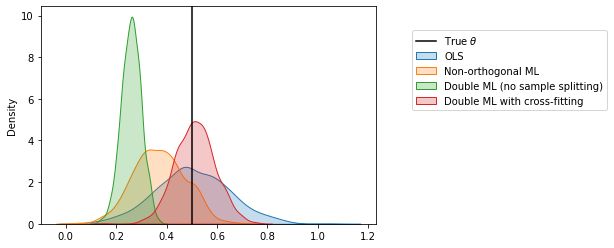

In [20]:
ax = sns.kdeplot(theta_ols, shade=True, label='OLS')

sns.kdeplot(theta_nonorth, shade=True, ax=ax, label='Non-orthogonal ML');

sns.kdeplot(theta_orth_nosplit, shade=True, label='Double ML (no sample splitting)');

sns.kdeplot(theta_dml, shade=True, label='Double ML with cross-fitting');

ax.axvline(0.5, color='k', label='True $\\theta$');

ax.legend(loc='lower center', bbox_to_anchor=(1.4, 0.5), ncol=1);

# 1.7. References

Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W. and Robins, J. (2018), Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, 21: C1-C68. doi:10.1111/ectj.12097.